In [81]:
import pandas as pd
diamonds = pd.read_csv('/Users/russellconte/diamonds.csv')
diamonds = diamonds.iloc[:, 1:]
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [82]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [83]:
print(diamonds["cut"].value_counts())
print(diamonds["color"].value_counts())
print(diamonds["clarity"].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [84]:
# let's look at the numerical fields

diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


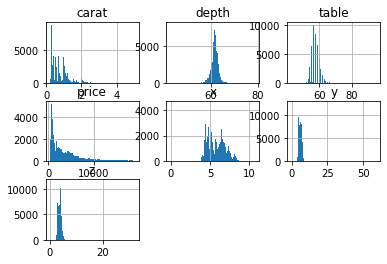

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
diamonds.hist(bins = 100)
plt.show()

## Create a test set, set it aside, never look at it

In [86]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state= 42)
print(len(train_set))
print(len(test_set))

43152
10788


# split the diamond prices into categories

In [119]:
diamonds["price_cat"] = pd.cut(diamonds["price"],
                               bins=[0.0, 3000,6000,9000,12000,15000,18000,21000],
                               labels=[1, 2, 3, 4, 5, 6, 7])
#diamonds["price_cat"].hist()
diamonds.head(30)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_cat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,1


Now you are ready to do stratified sampling based on the price category. For this you can use Scikit-Learn’s StratifiedShuffleSplit class:

In [120]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)

for train_index, test_index in split.split(diamonds, diamonds["price_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]

In [121]:
# Check to see if this worked:

strat_test_set["price_cat"].value_counts() / len(strat_test_set)
# You can start by looking at the table category proportions in the test set:

1    0.562384
2    0.223489
3    0.097423
4    0.052558
5    0.033556
6    0.024842
7    0.005747
Name: price_cat, dtype: float64

In [122]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis = 1, inplace = True)

#strat_test_set["price_cat"].value_counts/ len(strat_test_set)